In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

from eddies_detection import  get_traj_with_parcels, get_traj_with_numpy, find_eddies
from eddies_tracking import eddies_tracker
from plot import StreamPlot
from time import time
import numpy as np

d0 = 0
date_len = 20
stream_data_fname = "../data/data.nc"
runtime = 600
delta_time = 5
particle_grid_step = 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

## Compute the list of path

In [3]:
list_days = []

for di in range(date_len):
    print(di)
    t0 = time()
    b = get_traj_with_numpy(d0+di, runtime, delta_time, particle_grid_step, stream_data_fname)
    print("Time : ",time()-t0)
    
    bb = find_eddies(b)
    list_days.append(bb)

0
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.837443113327026
1
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.787588119506836
2
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  48.09384894371033
3
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.34534430503845
4
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  54.35551643371582
5
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  54.984577894210815
6
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  50.65212845802307
7
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.67601037025452
8
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60%

In [4]:
import random as rd

rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

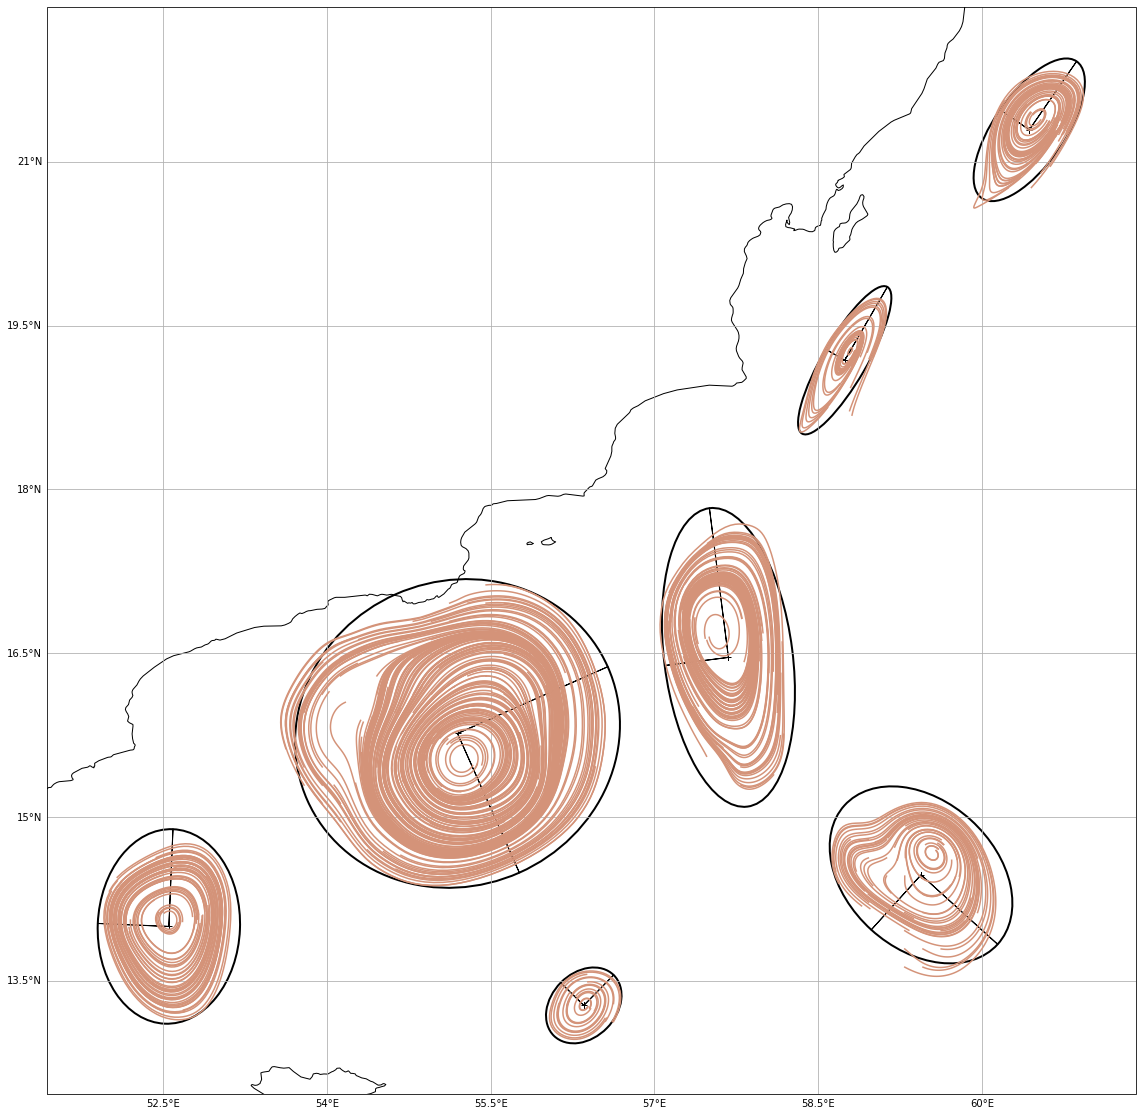

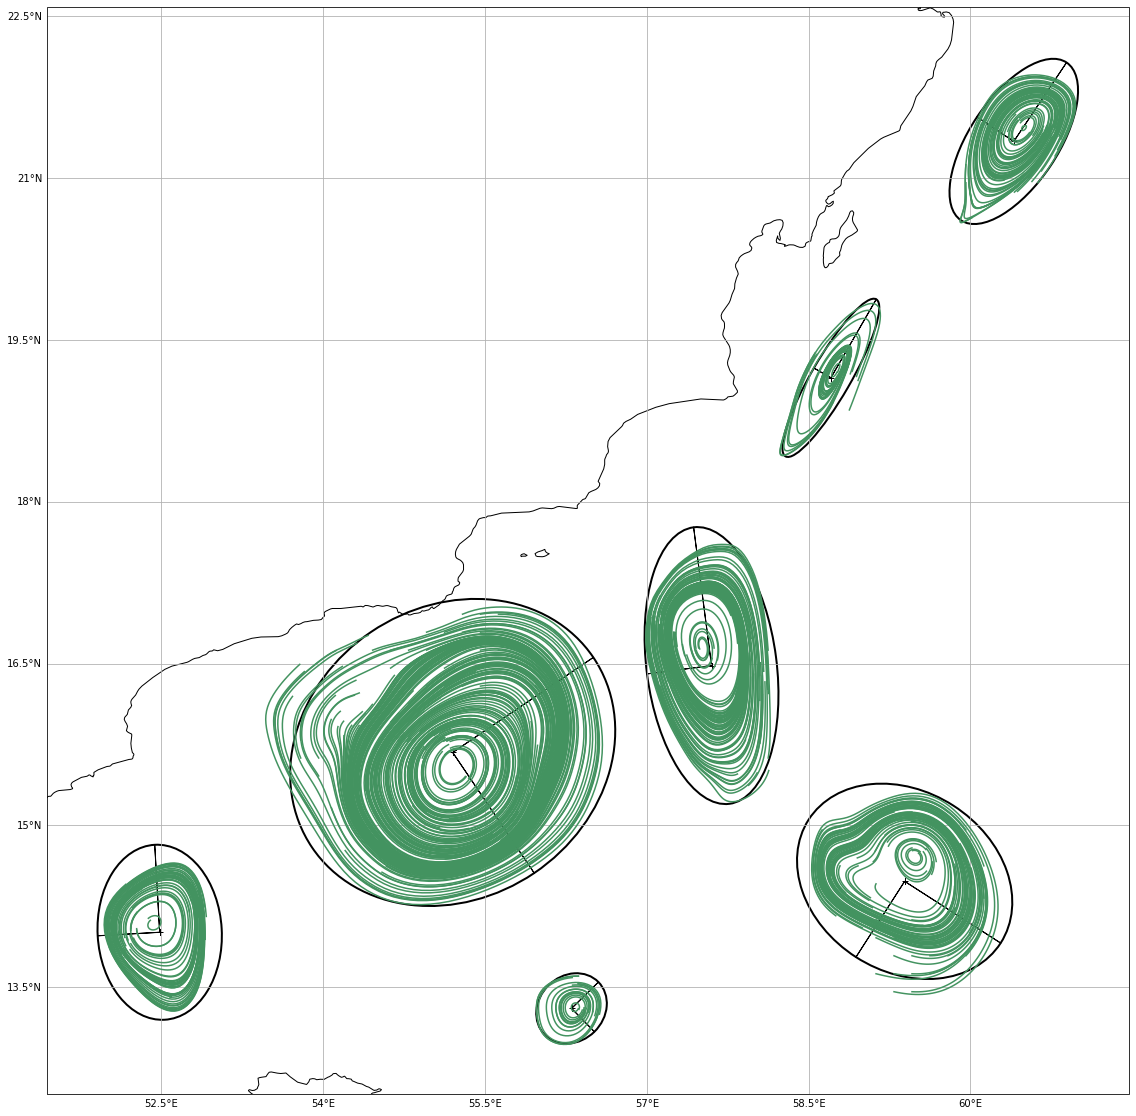

In [5]:
for bb in list_days[:2]:
    figure = StreamPlot()
    line_style = rd_color()
    figure.plot_eddies(bb,line_style=line_style)
    figure.show()

## Clustering

In [6]:
date_len = date_len
t0 = time()
paths = eddies_tracker(0,list_days[:date_len],nb_prev_day=8)
print("Time : ",time()-t0)

Time :  27.355897665023804


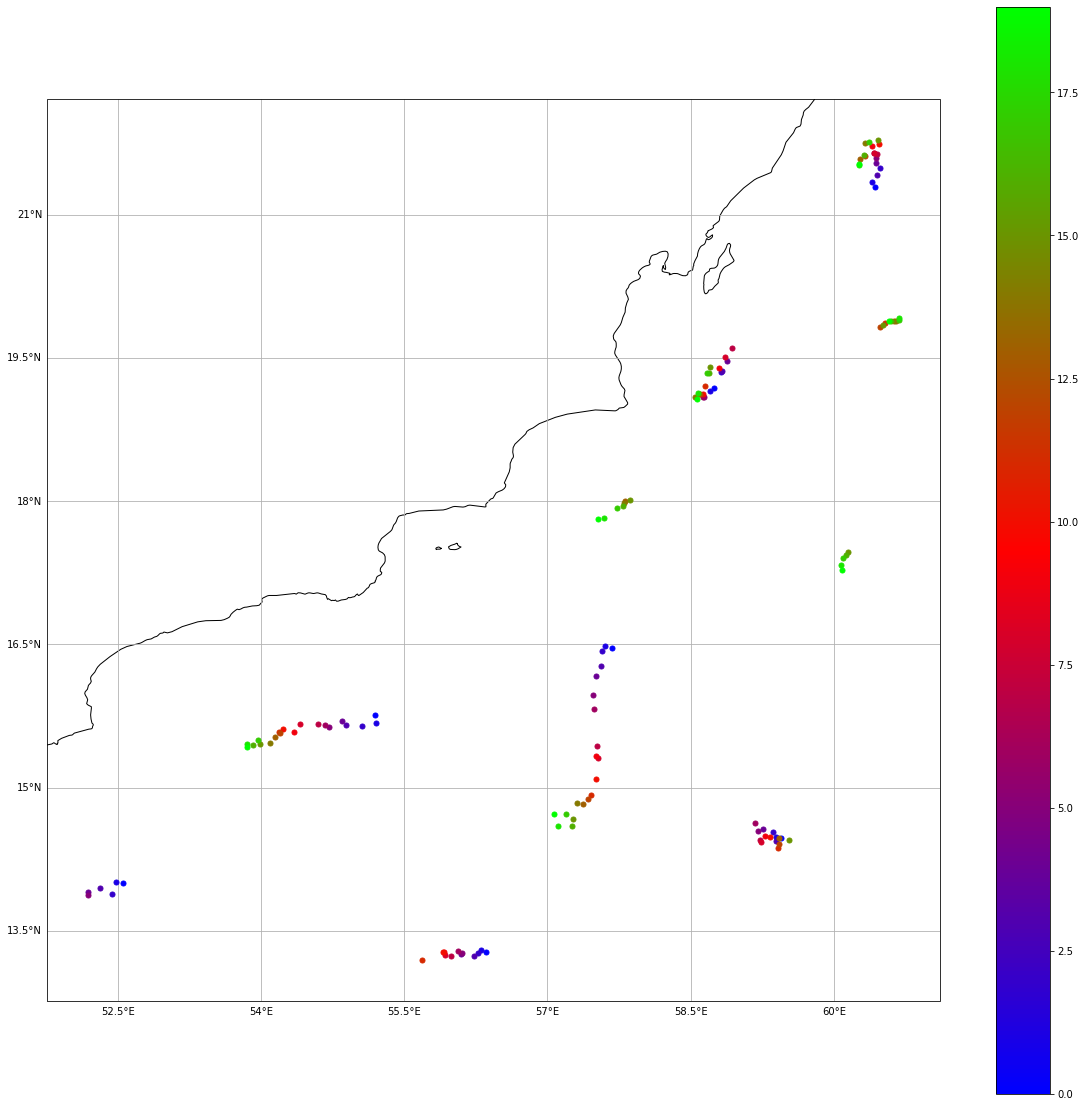

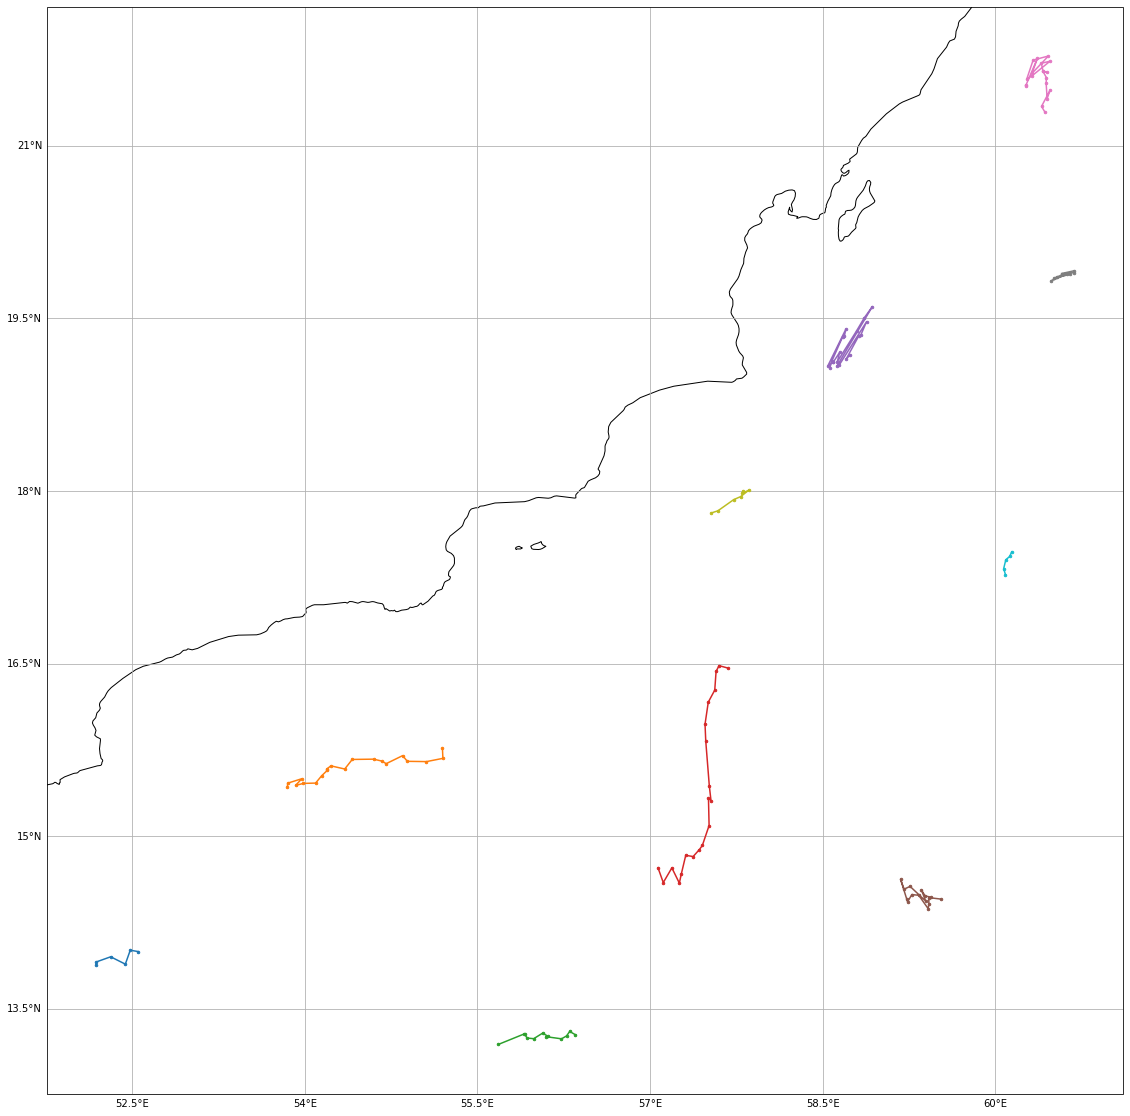

In [7]:
figure = StreamPlot()
figure.plot_catalogue(paths)
figure.show()

figure = StreamPlot()
figure.plot_eddies_trajectories(paths)
figure.show()